In [110]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [111]:
from sklearn.datasets import load_iris

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
import matplotlib.pyplot as plt

In [114]:
iris = load_iris()

In [115]:
X = iris.data
y = iris.target

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [76]:
keras.backend.clear_session()

In [77]:
np.random.seed(42)

In [78]:
tf.random.set_seed(42)

In [307]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(300,input_shape=(4,),activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(500,activation="relu",kernel_initializer="he_normal"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(3,activation="softmax")
    
])

In [308]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               1500      
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               50500     
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1

In [319]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

/usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/12
1/1 [==============================] - 0s 57ms/step - loss: 0.1159 - accuracy: 0.9589 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 2/12
1/1 [==============================] - 0s 28ms/step - loss: 0.1375 - accuracy: 0.9452 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 3/12
1/1 [==============================] - 0s 26ms/step - loss: 0.1354 - accuracy: 0.9589 - val_loss: 0.0215 - val_accuracy: 1.0000
Epoch 4/12
1/1 [==============================] - 0s 28ms/step - loss: 0.1121 - accuracy: 0.9452 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 5/12
1/1 [==============================] - 0s 26ms/step - loss: 0.1236 - accuracy: 0.9589 - val_loss: 0.0320 - val_accuracy: 1.0000
Epoch 6/12
1/1 [==============================] - 0s 30ms/step - loss: 0.1224 - accuracy: 0.9726 - val_loss: 0.0378 - val_accuracy: 0.9688
Epoch 7/12
1/1 [==============================] - 0s 26ms/step - loss: 0.1094 - accuracy: 0.9315 - val_loss: 0.0366 - val_accuracy: 0.9688
Epoch 8/12
1/1 [===========

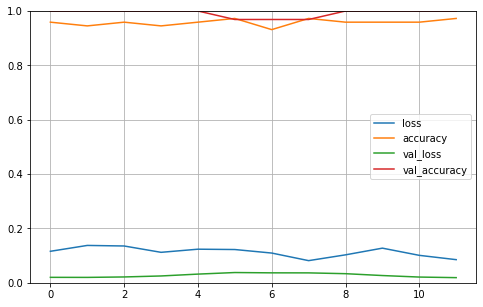

2/2 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9778
Final test set loss: 0.037359
Final test set accuracy: 0.977778


In [339]:
history = model.fit(X_train,y_train,batch_size=350,epochs=12,validation_split=0.3)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

results = model.evaluate(X_test,y_test)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

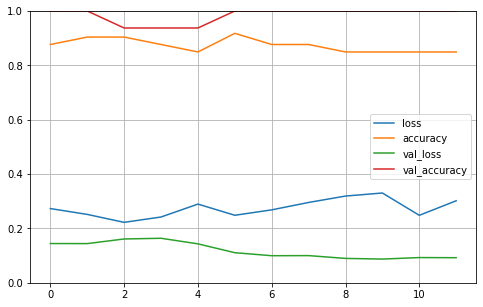

In [326]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [322]:
results = model.evaluate(X_test,y_test)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

2/2 [==============================] - 0s 4ms/step - loss: 0.2293 - accuracy: 0.9778
Final test set loss: 0.229301
Final test set accuracy: 0.977778


In [306]:
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Final test set loss: 0.093194
Final test set accuracy: 0.977778


In [344]:
class_names = iris.target_names

In [346]:
X_new = X_test[:5]

In [353]:
y_pred = model.predict(X_new)
y_pred = np.round(y_pred).astype(int)
print(np.array(class_names)[y_pred])

[['setosa' 'versicolor' 'setosa']
 ['versicolor' 'setosa' 'setosa']
 ['setosa' 'setosa' 'versicolor']
 ['setosa' 'versicolor' 'setosa']
 ['setosa' 'versicolor' 'setosa']]


In [355]:
y_new = y_test[:5]
print(np.array(class_names)[y_new])

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor']
